<a href="https://colab.research.google.com/github/Ameena1BM23CS27/6thSem-ML-Lab/blob/main/LogisticRegression_binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving HR_comma_sep.csv to HR_comma_sep (1).csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
df = pd.read_csv("HR_comma_sep.csv")

print(df.head())
print(df.info())
print(df.isnull().sum())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

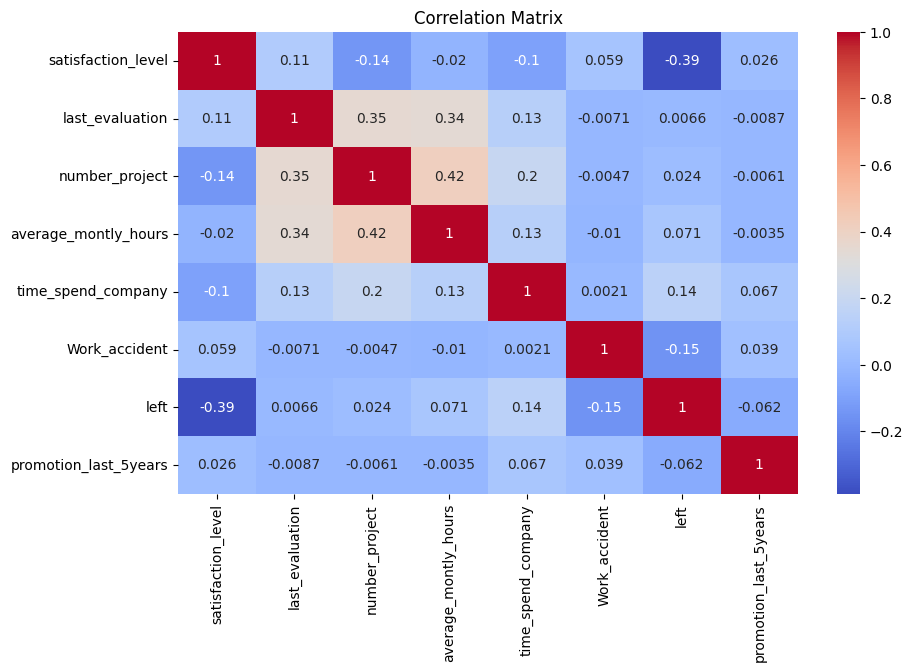

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [7]:
retention_summary = df.groupby("left").mean(numeric_only=True)
print(retention_summary)

      satisfaction_level  last_evaluation  number_project  \
left                                                        
0               0.666810         0.715473        3.786664   
1               0.440098         0.718113        3.855503   

      average_montly_hours  time_spend_company  Work_accident  \
left                                                            
0               199.060203            3.380032       0.175009   
1               207.419210            3.876505       0.047326   

      promotion_last_5years  
left                         
0                  0.026251  
1                  0.005321  


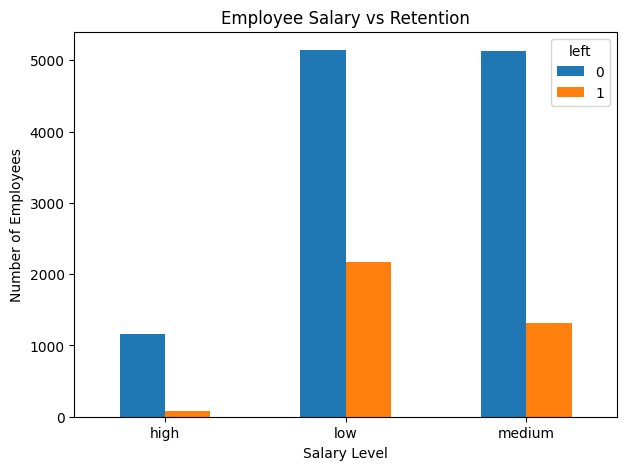

In [8]:
salary_retention = pd.crosstab(df.salary, df.left)

salary_retention.plot(kind='bar', figsize=(7,5))
plt.title("Employee Salary vs Retention")
plt.xlabel("Salary Level")
plt.ylabel("Number of Employees")
plt.xticks(rotation=0)
plt.show()

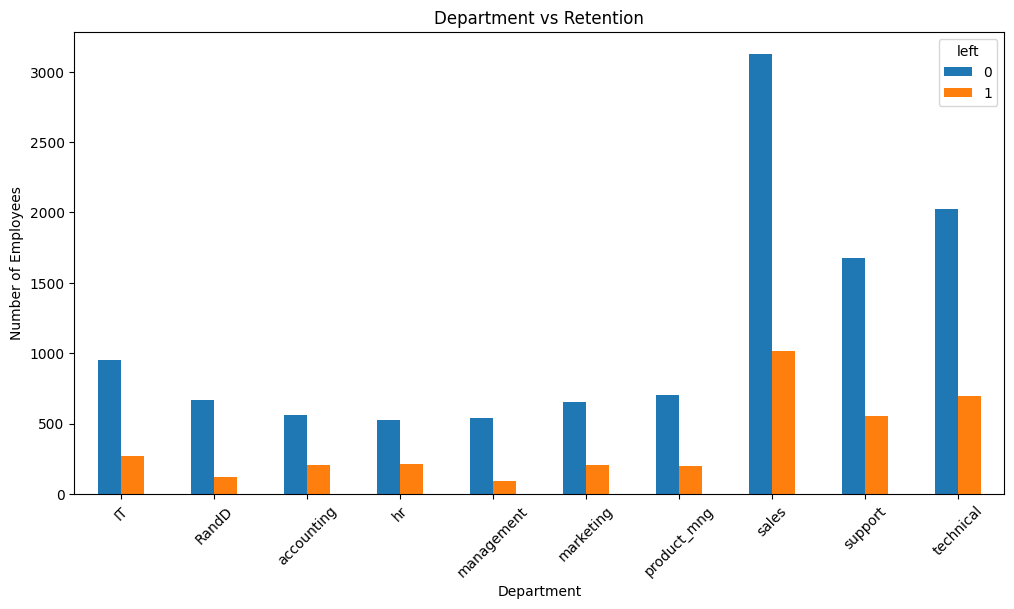

In [9]:
dept_retention = pd.crosstab(df.Department, df.left)

dept_retention.plot(kind='bar', figsize=(12,6))
plt.title("Department vs Retention")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45)
plt.show()

In [10]:
# Select relevant columns
model_df = df[['satisfaction_level',
               'average_montly_hours',
               'promotion_last_5years',
               'salary',
               'Department',
               'left']]

In [11]:
model_df = pd.get_dummies(model_df, columns=['salary', 'Department'], drop_first=True)

# Separate features and target
X = model_df.drop('left', axis=1)
y = model_df['left']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [13]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [14]:

y_pred = model.predict(X_test)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Model Accuracy: 0.7677777777777778

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      3428
           1       0.53      0.24      0.33      1072

    accuracy                           0.77      4500
   macro avg       0.66      0.59      0.59      4500
weighted avg       0.73      0.77      0.73      4500


Confusion Matrix:
[[3198  230]
 [ 815  257]]


In [ ]:
#without using libraries

In [16]:
import csv
import math
import random

filename = "HR_comma_sep.csv"

data = []
with open(filename, "r") as file:
    reader = csv.DictReader(file)
    for row in reader:
        data.append(row)

print("Total records:", len(data))
print("Columns:", data[0].keys())

Total records: 14999
Columns: dict_keys(['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'Department', 'salary'])


In [17]:
for row in data:
    row['satisfaction_level'] = float(row['satisfaction_level'])
    row['average_montly_hours'] = float(row['average_montly_hours'])
    row['promotion_last_5years'] = int(row['promotion_last_5years'])
    row['left'] = int(row['left'])

In [18]:
salary_counts = {}

for row in data:
    salary = row['salary']
    left = row['left']

    if salary not in salary_counts:
        salary_counts[salary] = [0, 0]  # [stay, leave]

    if left == 1:
        salary_counts[salary][1] += 1
    else:
        salary_counts[salary][0] += 1

print("\nSalary vs Retention")
for salary in salary_counts:
    stay = salary_counts[salary][0]
    leave = salary_counts[salary][1]
    print(salary, " | Stay:", "*" * (stay//50), " Leave:", "*" * (leave//50))


Salary vs Retention
low  | Stay: ******************************************************************************************************  Leave: *******************************************
medium  | Stay: ******************************************************************************************************  Leave: **************************
high  | Stay: ***********************  Leave: *


In [19]:
dept_counts = {}

for row in data:
    dept = row['Department']
    left = row['left']

    if dept not in dept_counts:
        dept_counts[dept] = [0, 0]

    if left == 1:
        dept_counts[dept][1] += 1
    else:
        dept_counts[dept][0] += 1

print("\nDepartment vs Retention")
for dept in dept_counts:
    stay = dept_counts[dept][0]
    leave = dept_counts[dept][1]
    print(dept, " | Stay:", "*" * (stay//50), " Leave:", "*" * (leave//50))


Department vs Retention
sales  | Stay: **************************************************************  Leave: ********************
accounting  | Stay: ***********  Leave: ****
hr  | Stay: **********  Leave: ****
technical  | Stay: ****************************************  Leave: *************
support  | Stay: *********************************  Leave: ***********
management  | Stay: **********  Leave: *
IT  | Stay: *******************  Leave: *****
product_mng  | Stay: **************  Leave: ***
marketing  | Stay: *************  Leave: ****
RandD  | Stay: *************  Leave: **


In [20]:
X = []
y = []

for row in data:
    features = [
        row['satisfaction_level'],
        row['average_montly_hours'],
        row['promotion_last_5years']
    ]
    X.append(features)
    y.append(row['left'])

In [21]:
combined = list(zip(X, y))
random.shuffle(combined)

split_index = int(0.7 * len(combined))
train_data = combined[:split_index]
test_data = combined[split_index:]

X_train = [item[0] for item in train_data]
y_train = [item[1] for item in train_data]

X_test = [item[0] for item in test_data]
y_test = [item[1] for item in test_data]

In [22]:
def sigmoid(z):
    return 1 / (1 + math.exp(-z))